In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [2]:
# My libraries
import sim_ann as sa
import model

## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [4]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  2.0
{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}
171.546812816
Temp:  1.0
{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}
171.546812816
Temp:  0.5
{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 '

## Dumping the simulated annealing results

In [5]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [6]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [7]:
a

{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}

In [8]:
new_cost = sa.get_error(a)

In [9]:
new_cost

(171.54681281619094,
 {'arousal': [0.3, 4],
  'attention_1': [2.8, 2],
  'attention_2': [0.2, 2],
  'dissatisfaction': [0.2, 2],
  'ff_ent': [1.4, 2],
  'ff_is': [2.1, 4],
  'ff_ko': [1.4, 2],
  'ff_se': [2.8, 2],
  'ff_si': [1.4, 4],
  'mood': [6.3, 2],
  'mood_speed': 0.5,
  'prep_comm': [3.5, 2],
  'prep_like': [2.8, 2],
  'prep_share': [2.1, 3],
  'satisfaction': [2.8, 2],
  'srs_sal': [0.7, 2]},
           mood      like     share   comment
 19    0.000004  0.147126  0.134129  0.005994
 39    0.000024  0.777336  0.702447  0.013814
 59    0.000014  0.252137  0.273491  0.167382
 79    0.000013  0.112666  0.236719  0.016942
 99    0.000010  0.119442  0.142328  0.006598
 119   0.000003  0.071063  0.147845  0.150571
 139   0.000010  0.235444  0.161732  0.080756
 159   0.000012  0.841021  0.623182  0.432468
 179   0.000019  0.028661  0.039314  0.010360
 199   0.000003  0.077930  0.151411  0.057624
 219   0.000015  0.472209  0.649682  0.161090
 239   0.000010  0.172136  0.322413  0.14532

In [10]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [11]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

In [12]:
parameters

{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}

## Inputs

### Message Categories

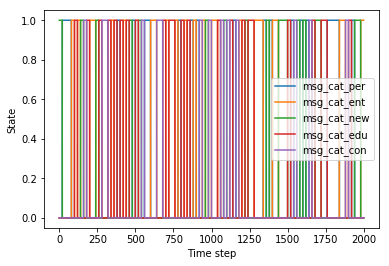

In [13]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

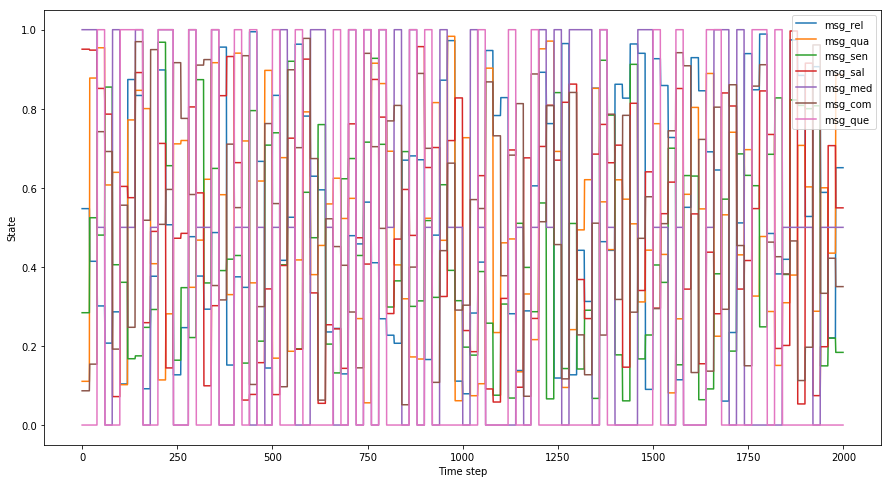

In [14]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

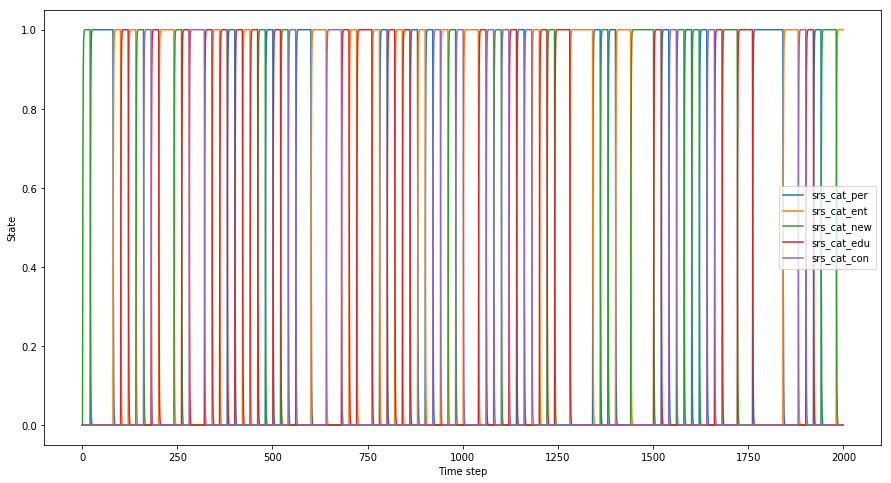

In [15]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

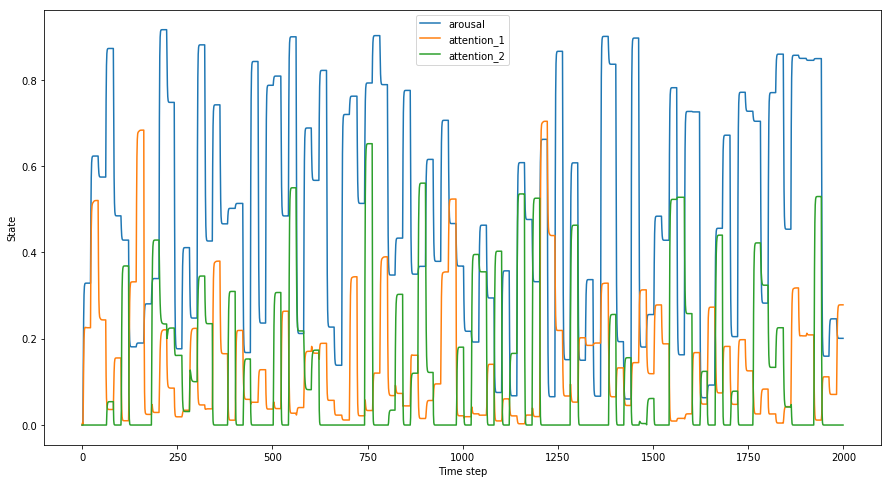

In [16]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

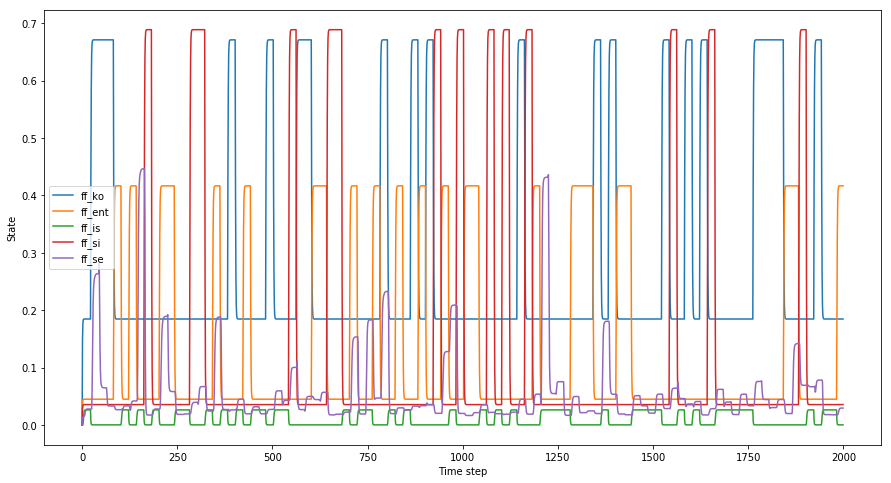

In [17]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

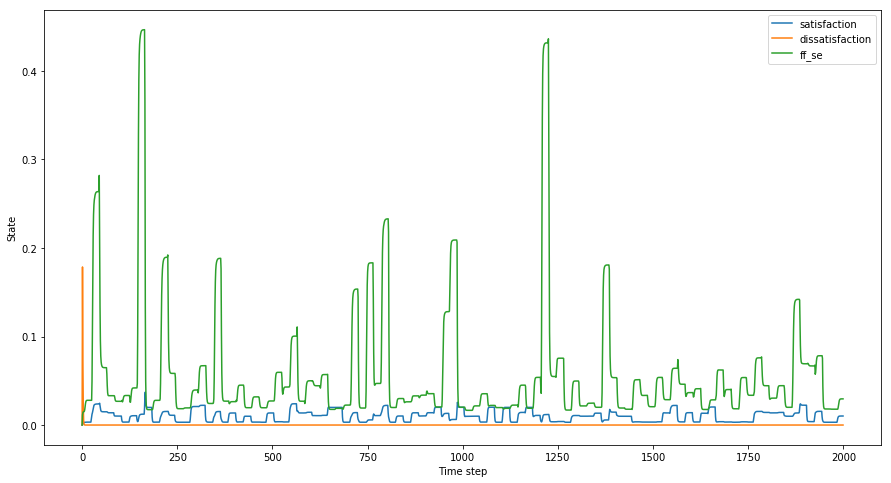

In [18]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

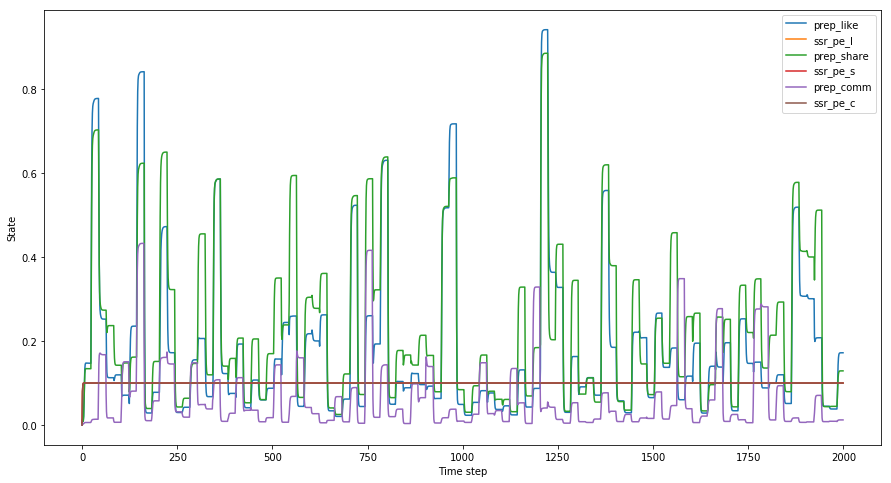

In [19]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

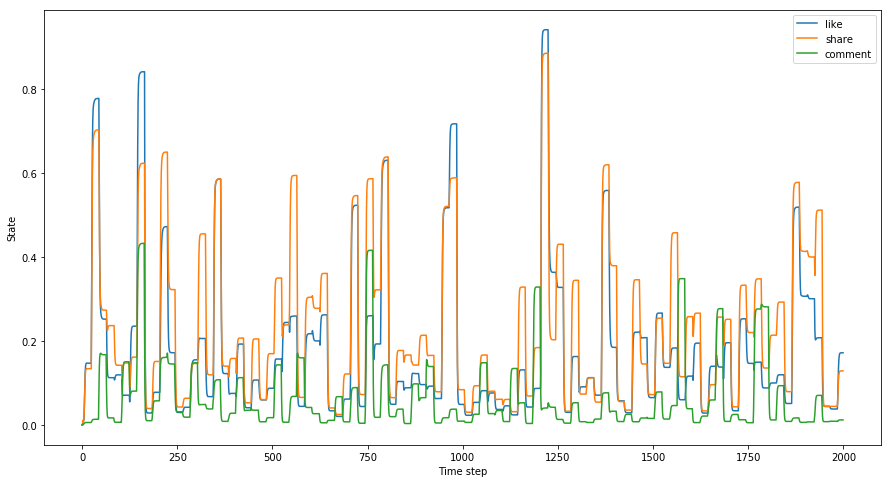

In [20]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

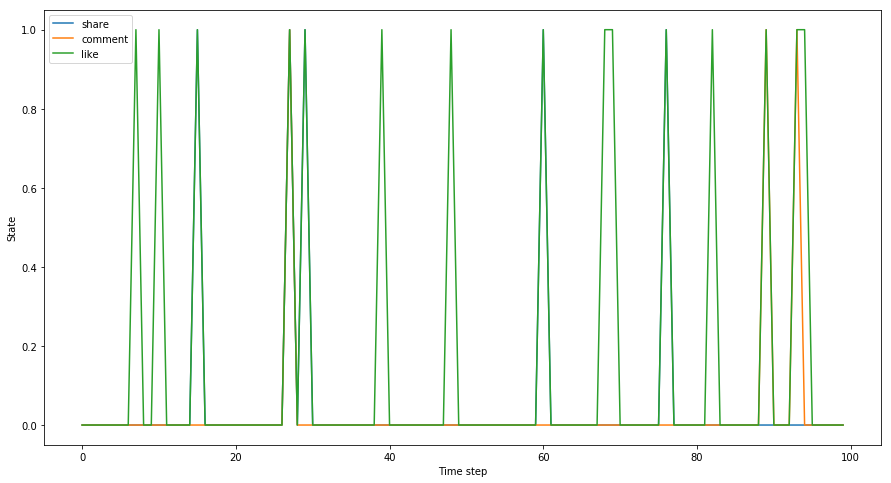

In [21]:
reactions1[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [22]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

# Agent 2

In [23]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [24]:
parameters

{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}

## Inputs

### Message Categories

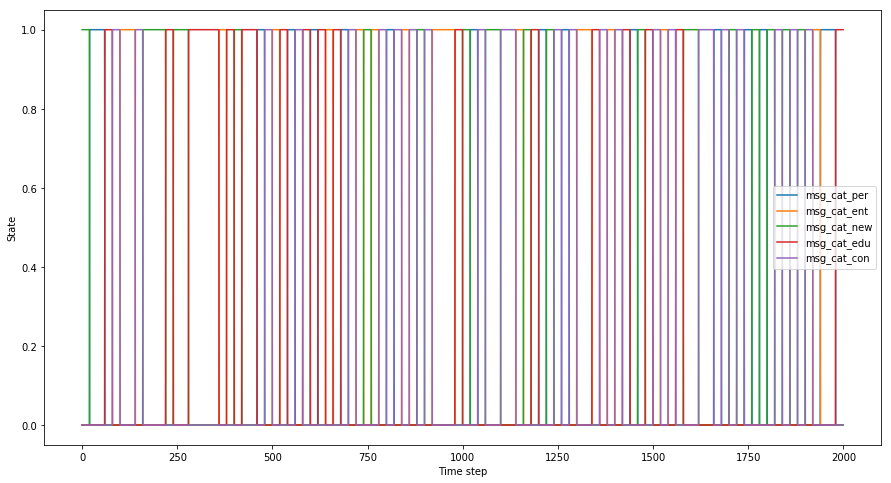

In [25]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

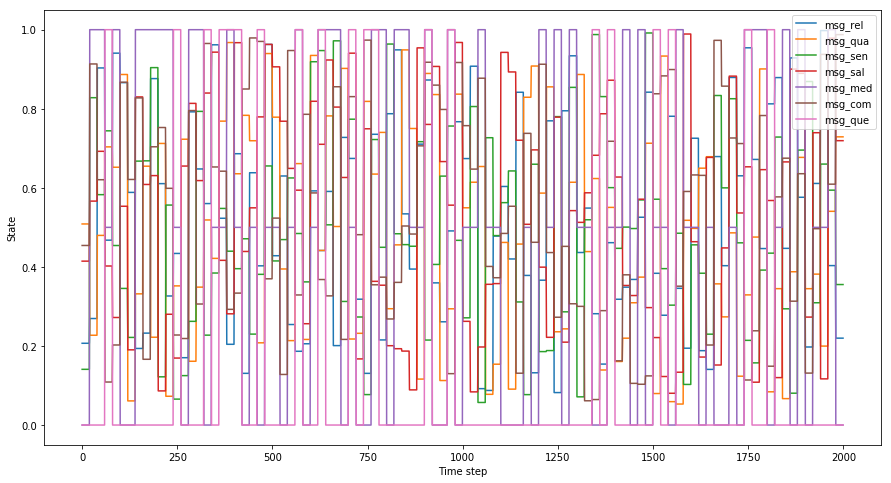

In [26]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

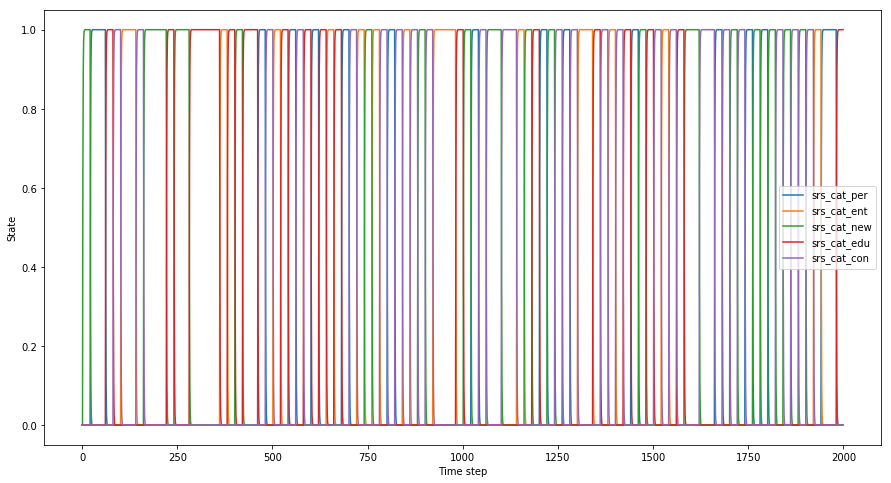

In [27]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

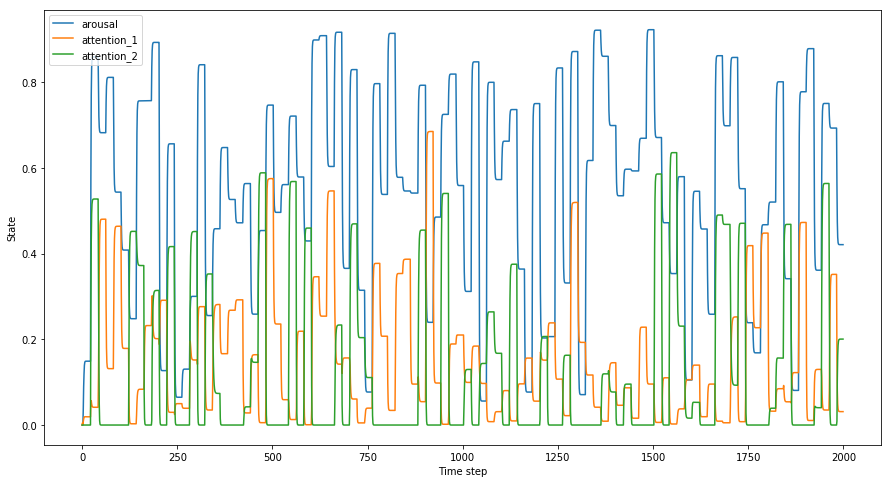

In [28]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

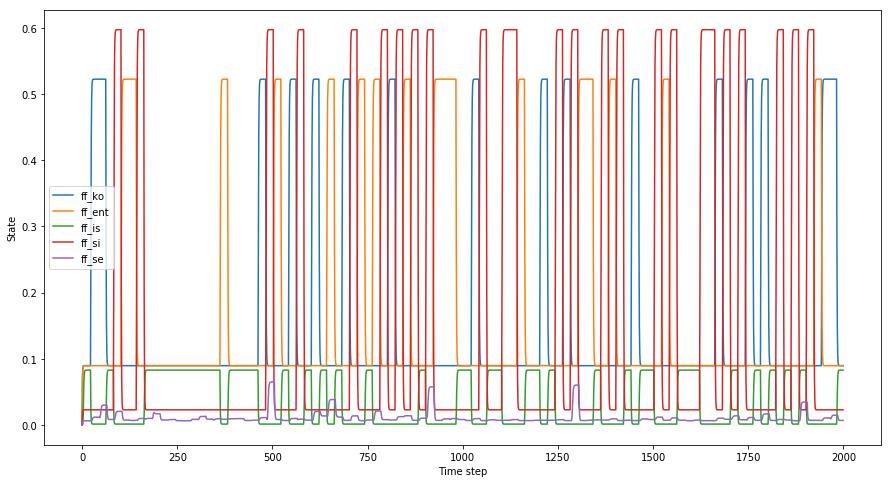

In [29]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

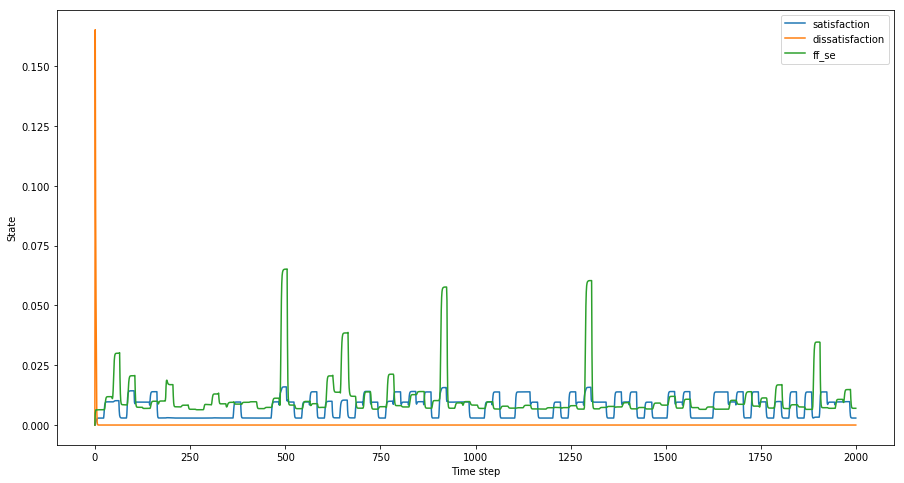

In [30]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

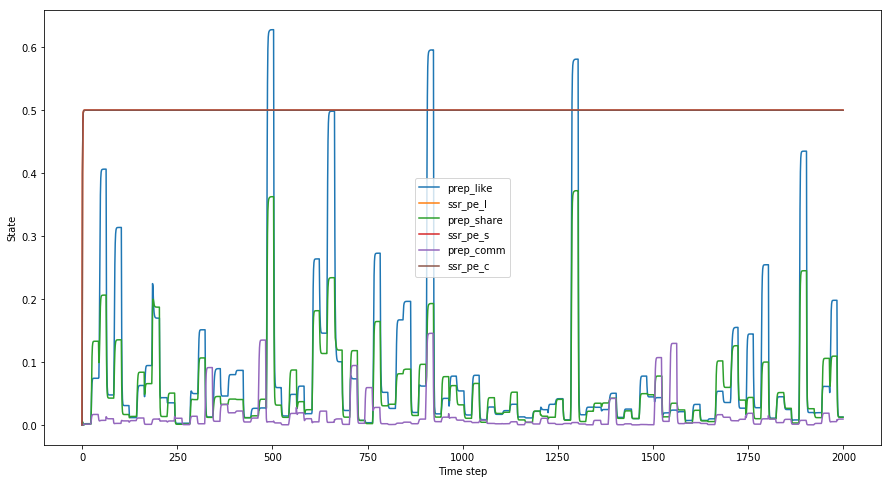

In [31]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

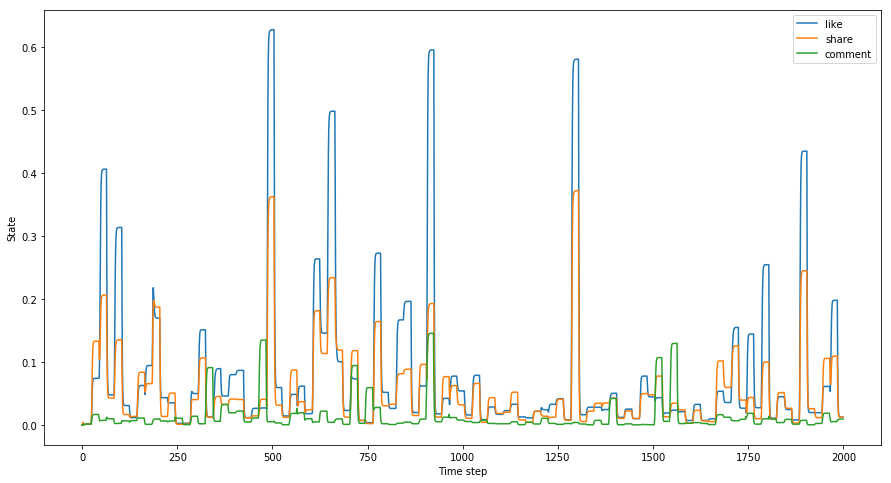

In [32]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

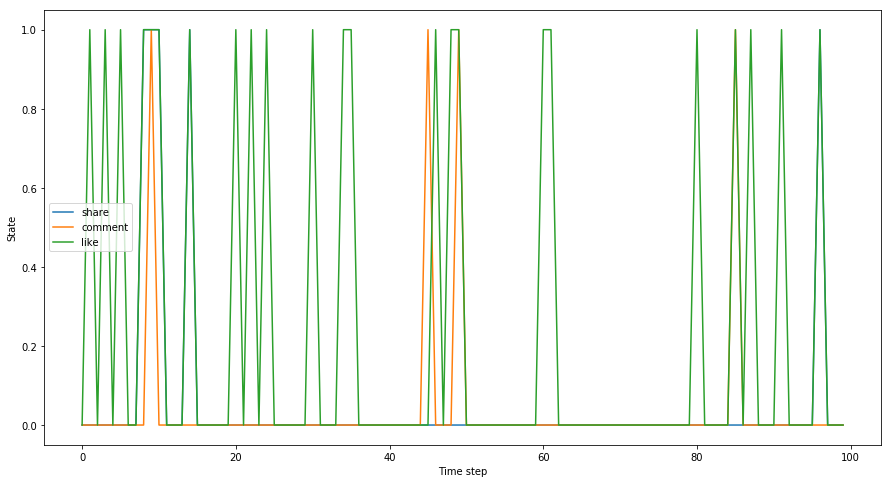

In [33]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [34]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

# Agent 3

In [35]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [36]:
parameters

{'arousal': [0.3, 4],
 'attention_1': [2.8, 2],
 'attention_2': [0.2, 2],
 'dissatisfaction': [0.2, 2],
 'ff_ent': [1.4, 2],
 'ff_is': [2.1, 4],
 'ff_ko': [1.4, 2],
 'ff_se': [2.8, 2],
 'ff_si': [1.4, 4],
 'mood': [6.3, 2],
 'mood_speed': 0.5,
 'prep_comm': [3.5, 2],
 'prep_like': [2.8, 2],
 'prep_share': [2.1, 3],
 'satisfaction': [2.8, 2],
 'srs_sal': [0.7, 2]}

## Inputs

### Message Categories

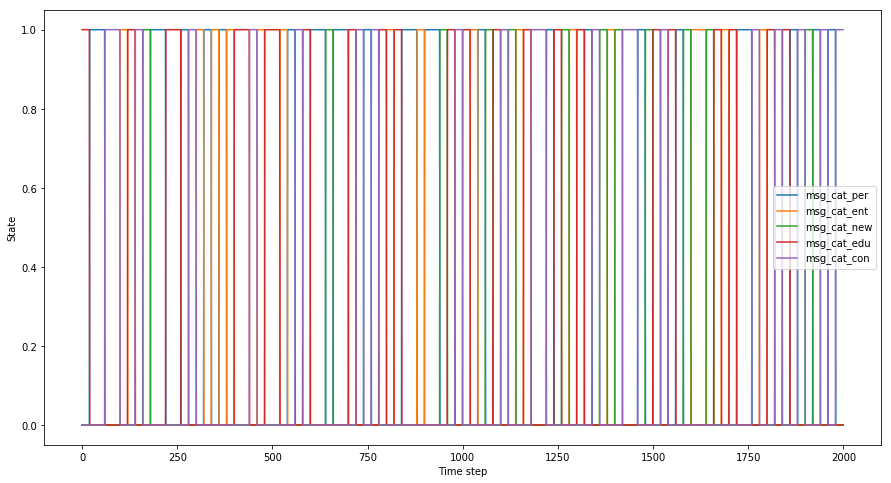

In [37]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

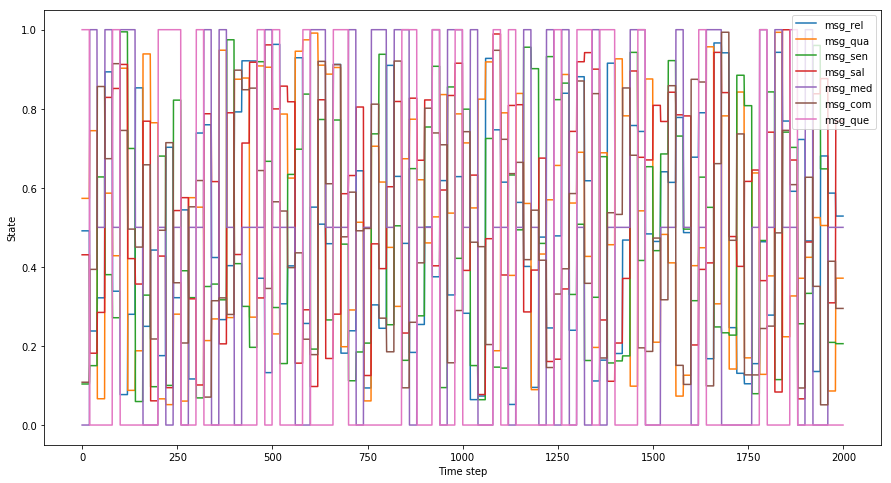

In [38]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

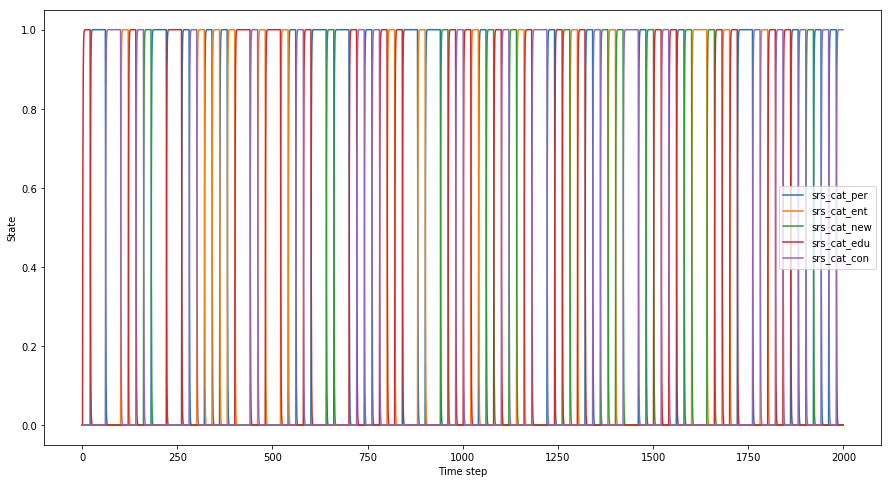

In [39]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

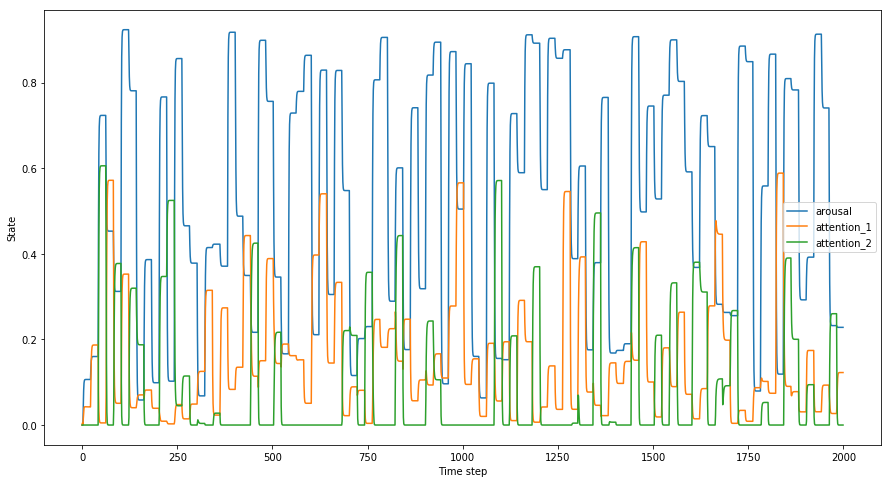

In [40]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

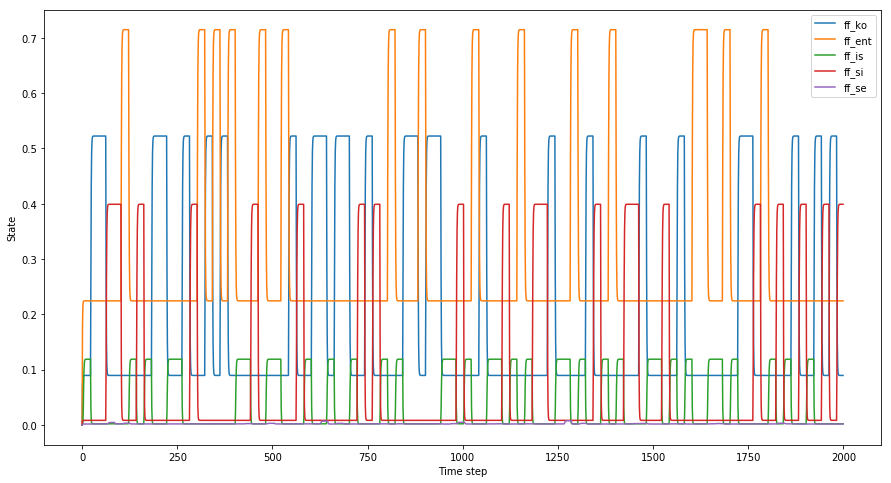

In [41]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

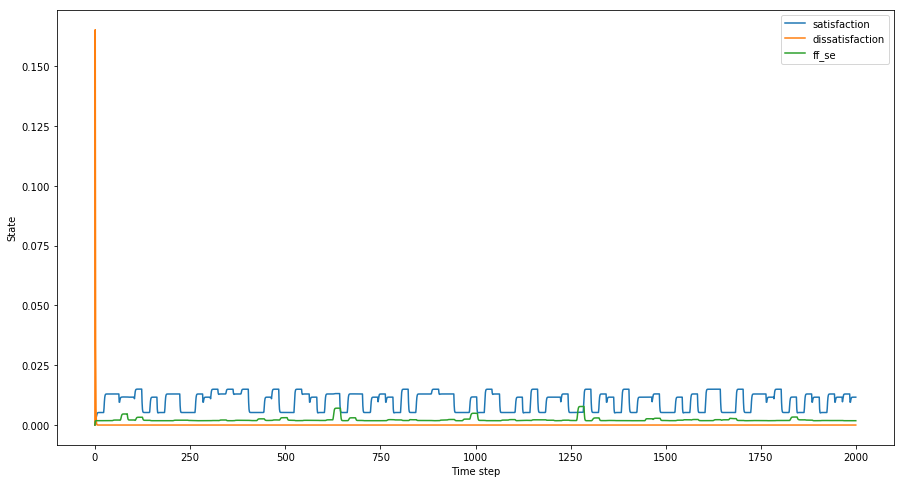

In [42]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

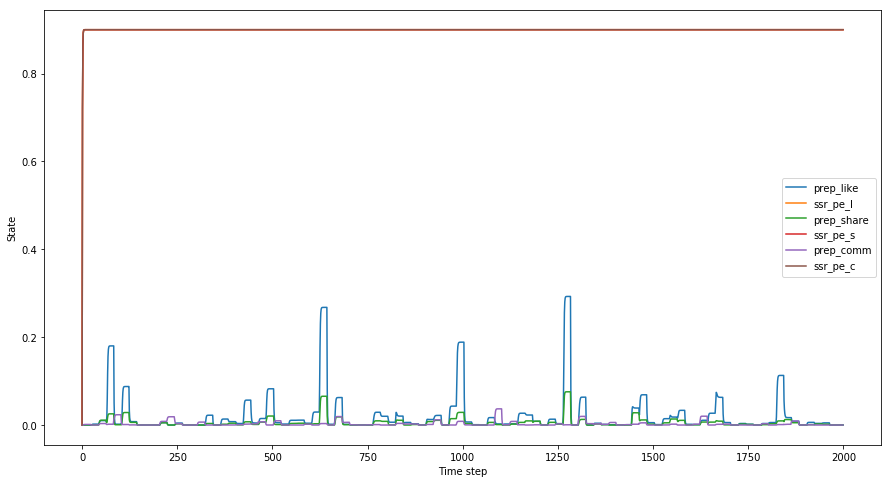

In [43]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

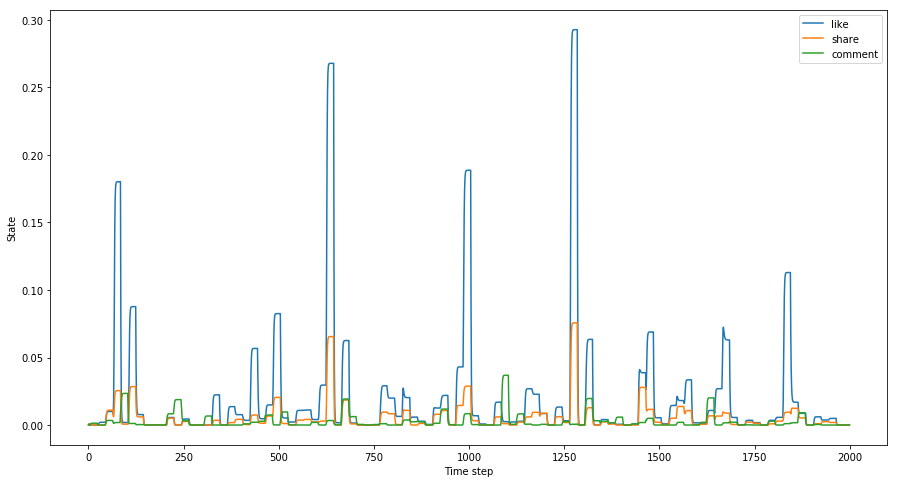

In [44]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

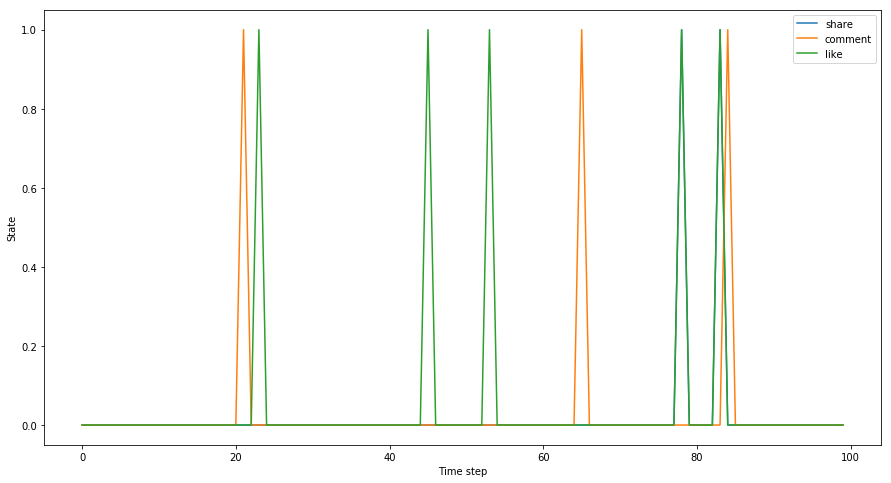

In [45]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [46]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')